# Pandas Tutorial


---



This notebook serves as an introduction to the essential data structures offered by the **Pandas** library, a cornerstone tool in the Python data science ecosystem.

Built on top of NumPy, Pandas provides a highly efficient and flexible implementation of **DataFrames**—two-dimensional, labeled data structures that support heterogeneous data types and gracefully handle missing values. These DataFrames enable powerful data manipulation capabilities through intuitive and high-level operations.

Throughout this notebook, we will use the standard alias `pd` when importing Pandas.


In [2]:
import pandas as pd
import numpy as np

## Pandas Series


A Pandas `Series` is a one-dimensional array of indexed data.

In [3]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

,0
0,0.25
1,0.50
2,0.75
3,1.00


The contents can be accessed in the same way as for NumPy arrays, to the difference that when more than one value is selected, the type remains a Pandas ``Series``.

In [4]:
print(data[0],type(data[0]))

0.25 <class 'numpy.float64'>


In [5]:
print(data[2:],type(data[2:]))

2    0.75
3    1.00
dtype: float64 <class 'pandas.core.series.Series'>


The type ``Series`` wraps both a sequence of values and a sequence of indices, which we can access with the <tt>values</tt> and <tt>index</tt> attributes.

* ``values`` are the contents of the series as a NumPy array

In [6]:
print(data.values,type(data.values))

[0.25 0.5  0.75 1.  ] <class 'numpy.ndarray'>


* ``index`` are the indices of the series

In [7]:
print(data.index,type(data.index))

RangeIndex(start=0, stop=4, step=1) <class 'pandas.core.indexes.range.RangeIndex'>


### Series Indices

The main difference between NumPy arrays and Pandas Series is the presence of this <tt>index</tt> field. By default, it is set (as in NumPy arrays) as <tt>0,1,..,size_of_the_series</tt> but a Series index can be explicitly defined. The indices may be numbers but also strings. Then, the contents of the series *have to* be accessed using these defined indices.

In [8]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=['a', 'b', 'c', 'd'])
print(data)

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64


In [9]:
print(data['c'])

0.75


In [10]:
data = pd.Series([0.25, 0.5, 0.75, 1.0], index=[1, 3, 4, 2])
print(data)

1    0.25
3    0.50
4    0.75
2    1.00
dtype: float64


In [11]:
print(data[2])

1.0


### Series and Python Dictionaries

Pandas Series and Python Dictionaries are close semantically: mappping keys to values. However, the implementation of Pandas series is usually more efficient than dictionaries in the context of data science. Naturally, Series can be contructed from dictionaries.

In [12]:
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population_dict,type(population_dict))
print(population,type(population))

{'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135} <class 'dict'>
California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64 <class 'pandas.core.series.Series'>


In [13]:
population['California']

np.int64(38332521)

In [14]:
population['California':'Illinois']

,0
California,38332521
Texas,26448193
New York,19651127
Florida,19552860
Illinois,12882135


## Pandas DataFrames

DataFrames is a fundamental object of Pandas that mimicks what can be found in `R` for instance. Dataframes can be seen as an array of Series: to each `index` (corresponding to an individual for instance or a line in a table), a Dataframe maps multiples values; these values corresponds to the `columns` of the DataFrame which each have a name (as a string).   


In the following example, we will construct a Dataframe from two Series with common indices.

In [15]:
area = pd.Series( {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})

In [16]:
states = pd.DataFrame({'Population': population, 'Area': area})
print(states,type(states))

            Population    Area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995 <class 'pandas.core.frame.DataFrame'>


In Jupyter notebooks, DataFrames are displayed in a fancier way when the name of the dataframe is typed (instead of using <tt>print</tt>)

In [17]:
states

,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


DataFrames have
* <tt>index</tt> that are the defined indices as in Series
* <tt>columns</tt> that are the columns names
* <tt>values</tt> that return a (2D) NumPy array with the contents

In [18]:
print(states.index)
print(states.columns)
print(states.values,type(states.values),states.values.shape)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object')
Index(['Population', 'Area'], dtype='object')
[[38332521   423967]
 [26448193   695662]
 [19651127   141297]
 [19552860   170312]
 [12882135   149995]] <class 'numpy.ndarray'> (5, 2)


*Warning:*  When accessing a Dataframe, `dataframe_name[column_name]` return the corresponding column as a Series. `dataframe_name[index_name]` returns an error! We will see later how to access a specific index.

In [19]:
print(states['Area'],type(states['Area']))

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: Area, dtype: int64 <class 'pandas.core.series.Series'>


In [20]:
try:
    print(states['California'])
except KeyError as error:
    print("KeyError: ",error)

KeyError:  'California'


### Dataframe creation

To create DataFrames, the main methods are:
* from Series (as above)

In [21]:
print(population,type(population))
states = pd.DataFrame({'Population': population, 'Area': area})
states

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64 <class 'pandas.core.series.Series'>


,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


* from NumPy arrays (the columns and indices are taken as the array's ones)

In [22]:
A = np.random.randn(5,3)
print(A,type(A))
dfA = pd.DataFrame(A)
dfA

[[ 1.23109141  0.82110213 -0.39784555]
 [ 0.70743204  0.77322028  2.56313599]
 [ 0.55106763 -1.28878338 -1.71009695]
 [ 0.02058304  0.73387614 -0.27363602]
 [-0.88494975 -0.31683073 -0.27709589]] <class 'numpy.ndarray'>


,0,1,2
0,1.231091,0.821102,-0.397846
1,0.707432,0.773220,2.563136
2,0.551068,-1.288783,-1.710097
3,0.020583,0.733876,-0.273636
4,-0.884950,-0.316831,-0.277096


* from a *list* of *dictionaries*. Be careful, each element of the list is an example (corresponding to an automatic index 0,1,...) while each key of the dictonary corresponds to a column.

In [23]:
data = [{'a': i, 'b': 2 * i} for i in range(3)]
print(data,type(data))
print(data[0],type(data[0]))

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}] <class 'list'>
{'a': 0, 'b': 0} <class 'dict'>


In [24]:
df = pd.DataFrame(data)
df

,a,b
0,0,0
1,1,2
2,2,4


* from a *file* , typically a <tt>csv</tt> file (for comma separated values), eventually with the names of the columns as a first line.


    col_1_name,col_2_name,col_3_name
    col_1_v1,col_2_v1,col_3_v1
    col_1_v2,col_2_v2,col_3_v2
    ...
    
For other files types (MS Excel, libSVM, any other separator) see this [part of the doc](https://pandas.pydata.org/pandas-docs/stable/api.html#input-output)

In [25]:
!head -4 data/president_heights.csv # bash command to see the first 4 lines of the file

head: cannot open 'data/president_heights.csv' for reading: No such file or directory


In [29]:
data = pd.read_csv('president_heights.csv')
data

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


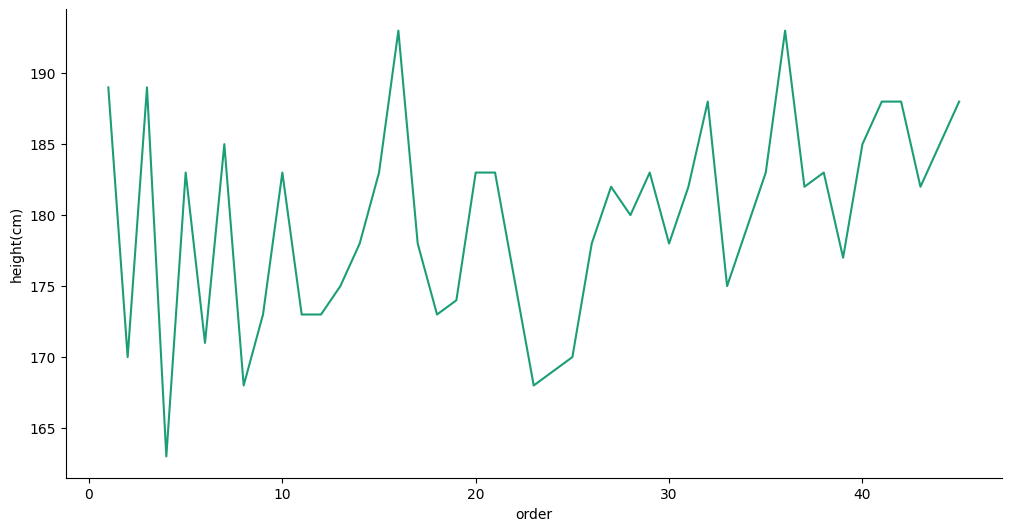

In [30]:
# @title order vs height(cm)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['order']
  ys = series['height(cm)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('order', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('order')
_ = plt.ylabel('height(cm)')

### Names and Values

Notice there can be missing values in DataFrames.

In [31]:
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


You can set indices and columns names *a posteriori*

In [32]:
dfA.columns = ['a','b','c']
dfA.index = [i**2 for i in range(1,6)  ]
dfA

,a,b,c
1,1.231091,0.821102,-0.397846
4,0.707432,0.773220,2.563136
9,0.551068,-1.288783,-1.710097
16,0.020583,0.733876,-0.273636
25,-0.884950,-0.316831,-0.277096


## Indexing




In [33]:
area = pd.Series( {'California': 423967, 'Texas': 695662, 'New York': 141297, 'Florida': 170312, 'Illinois': 149995})
population = pd.Series({'California': 38332521, 'Texas': 26448193, 'New York': 19651127, 'Florida': 19552860, 'Illinois': 12882135})
states = pd.DataFrame({'Population': population, 'Area': area})
states

,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [ ]:
# @title Population vs Area

from matplotlib import pyplot as plt
states.plot(kind='scatter', x='Population', y='Area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

You may access columns directly with names, *then* you can access individuals with their index.

In [34]:
states['Area']

,Area
California,423967
Texas,695662
New York,141297
Florida,170312
Illinois,149995


In [35]:
states['Area']['Texas']

np.int64(695662)

To ease the access, Pandas offers dedicated methods:
* <tt>iloc</tt> enables to access subparts of the dataframe as if it was a NumPy array.

In [36]:
states.iloc[:2]

,Population,Area
California,38332521,423967
Texas,26448193,695662


In [37]:
states.iloc[:2,0]

,Population
California,38332521
Texas,26448193


* <tt>loc</tt> does the same but with the explicit names (the last one is included)

In [38]:
states.loc[:'New York']

,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297


In [39]:
states.loc[:,'Population':]

,Population,Area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


## Questions and Exercises

**1. Series:**
   - Create a Pandas Series with the following data: [10, 20, 30, 40, 50].
   - Access the third element of the Series.
   - What is the data type of the Series?

**2. DataFrames:**
   - Create a Pandas DataFrame with two columns: 'Name' and 'Age'.
   - Add three rows to the DataFrame with the following data:
     - Name: 'Alice', Age: 25
     - Name: 'Bob', Age: 30
     - Name: 'Charlie', Age: 35
   - Access the 'Age' column of the DataFrame.
   - What is the shape of the DataFrame?

**3. Indexing:**
   - Using the DataFrame from question 2, access the row with the name 'Bob' using `loc`.
   - Access the age of 'Alice' using `iloc`.

**4. File I/O:**
   - Read the 'president_heights.csv' file into a DataFrame.
   - What is the average height of the presidents?
   - What is the name of the tallest president?

**5. Advanced:**
   - Create a DataFrame with three columns: 'A', 'B', and 'C'.
   - Fill the DataFrame with random numbers.
   - Calculate the mean of each column.
   - Add a new column 'D' which is the sum of columns 'A' and 'B'.
   - Sort the DataFrame by column 'D' in descending order.

**1. Series:**

Create a Pandas Series with the following data: [10, 20, 30, 40, 50].
Access the third element of the Series.
What is the data type of the Series?

In [42]:
data = [10, 20, 30, 40, 50]
series = pd.Series(data)


#accessing the third element of this series
print(series[2])

#data type of the series
print(series.dtype)

30
int64


**2. DataFrames:**

Create a Pandas DataFrame with two columns: 'Name' and 'Age'.
Add three rows to the DataFrame with the following data:
Name: 'Alice', Age: 25
Name: 'Bob', Age: 30
Name: 'Charlie', Age: 35
Access the 'Age' column of the DataFrame.
What is the shape of the DataFrame?

In [49]:
data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}
df = pd.DataFrame(data)

#accessing the age column
print(df['Age'])

#shape of df
print('shape of df is: ', df.shape)


0    25
1    30
2    35
Name: Age, dtype: int64
shape of df is:  (3, 2)


**3. Indexing:**

Using the DataFrame from question 2, access the row with the name 'Bob' using loc.
Access the age of 'Alice' using iloc.

In [55]:
print(df,'\n')

#row where name is bob using loc
nm = df.loc[df['Name'] == 'Bob']
print(nm)

alice_age = df.iloc[0,1]
print('\nalice_age: ',alice_age)

      Name  Age
0    Alice   25
1      Bob   30
2  Charlie   35 

  Name  Age
1  Bob   30

alice_age:  25


**4. File I/O:**

Read the 'president_heights.csv' file into a DataFrame.
What is the average height of the presidents?
What is the name of the tallest president?


In [64]:
#reading from file
df = pd.read_csv('president_heights.csv')
print(df.head())


avg_height = df['height(cm)'].mean()
print('average height is:', avg_height)

tallest = df.loc[df['height(cm)'] == df['height(cm)'].max()]
print('\n\n\ttallest president\n',tallest)

   order               name  height(cm)
0      1  George Washington         189
1      2         John Adams         170
2      3   Thomas Jefferson         189
3      4      James Madison         163
4      5       James Monroe         183
average height is: 179.93023255813952


	tallest president
     order               name  height(cm)
15     16    Abraham Lincoln         193
33     36  Lyndon B. Johnson         193


**5. Advanced:**

Create a DataFrame with three columns: 'A', 'B', and 'C'.
Fill the DataFrame with random numbers.
Calculate the mean of each column.
Add a new column 'D' which is the sum of columns 'A' and 'B'.
Sort the DataFrame by column 'D' in descending order.

In [65]:
data = {'A': np.random.rand(5),
        'B': np.random.rand(5),
        'C': np.random.rand(5)}
df = pd.DataFrame(data)
print(df)

          A         B         C
0  0.516410  0.949488  0.153207
1  0.445699  0.265648  0.654007
2  0.905400  0.372523  0.249186
3  0.955713  0.267861  0.743310
4  0.564682  0.321420  0.429667


In [70]:
#one by one calculating
# mean_A = df['A'].mean()
# mean_B = df['B'].mean()
# mean_C = df['C'].mean()

# but here we can calculate at once
print(df.mean())

A    0.677581
B    0.435388
C    0.445876
dtype: float64


In [71]:
df['D'] = df['A'] + df['B']
print(df)

          A         B         C         D
0  0.516410  0.949488  0.153207  1.465898
1  0.445699  0.265648  0.654007  0.711347
2  0.905400  0.372523  0.249186  1.277923
3  0.955713  0.267861  0.743310  1.223574
4  0.564682  0.321420  0.429667  0.886101


In [72]:
df.sort_values('D',ascending=False)

,A,B,C,D
0,0.516410,0.949488,0.153207,1.465898
2,0.905400,0.372523,0.249186,1.277923
3,0.955713,0.267861,0.743310,1.223574
4,0.564682,0.321420,0.429667,0.886101
1,0.445699,0.265648,0.654007,0.711347
